In [70]:
import numpy as np
import tensorflow as tf
#import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization,LSTM,TimeDistributed
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [71]:
train_dir="/Users/aishaandatt/Downloads/IBM/Train"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 12124 images belonging to 101 classes.


In [72]:
import os
from PIL import Image
folder_path = 'Train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [73]:
train_ds.image_shape

(224, 224, 3)

In [74]:
classes

['Aamir_Khan',
 'Abhay_Deol',
 'Abhishek_Bachchan',
 'Aftab_Shivdasani',
 'Aishwarya_Rai',
 'Ajay_Devgn',
 'Akshay_Kumar',
 'Akshaye_Khanna',
 'Alia_Bhatt',
 'Ameesha_Patel',
 'Amitabh_Bachchan',
 'Amrita_Rao',
 'Amy_Jackson',
 'Anil_Kapoor',
 'Anushka_Sharma',
 'Anushka_Shetty',
 'Arjun_Kapoor',
 'Arjun_Rampal',
 'Arshad_Warsi',
 'Asin',
 'Ayushmann_Khurrana',
 'Bhumi_Pednekar',
 'Bipasha_Basu',
 'Bobby_Deol',
 'Class27902',
 'Deepika_Padukone',
 'Disha_Patani',
 'Emraan_Hashmi',
 'Esha_Gupta',
 'Farhan_Akhtar',
 'Govinda',
 'Hrithik_Roshan',
 'Huma_Qureshi',
 'Ileana_DΓÇÖCruz',
 'Irrfan_Khan',
 'Jacqueline_Fernandez',
 'John_Abraham',
 'Juhi_Chawla',
 'Kajal_Aggarwal',
 'Kajol',
 'Kangana_Ranaut',
 'Kareena_Kapoor',
 'Karisma_Kapoor',
 'Kartik_Aaryan',
 'Katrina_Kaif',
 'Kiara_Advani',
 'Kriti_Kharbanda',
 'Kriti_Sanon',
 'Kunal_Khemu',
 'Lara_Dutta',
 'Madhuri_Dixit',
 'Manoj_Bajpayee',
 'Mrunal_Thakur',
 'Nana_Patekar',
 'Nargis_Fakhri',
 'Naseeruddin_Shah',
 'Nushrat_Bharucha',


In [75]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
newnew = Sequential()
newnew.add(TimeDistributed(model))
newnew.add(LSTM(100))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [76]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 54, 54, 64)        256       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 52, 52, 64)      

In [77]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
379/379 [==============================] - 460s 1s/step - loss: 4.5968 - accuracy: 0.0349
Epoch 2/30
379/379 [==============================] - 480s 1s/step - loss: 4.1139 - accuracy: 0.0762
Epoch 3/30
379/379 [==============================] - 425s 1s/step - loss: 3.7759 - accuracy: 0.1209
Epoch 4/30
379/379 [==============================] - 405s 1s/step - loss: 3.4890 - accuracy: 0.1668
Epoch 5/30
379/379 [==============================] - 492s 1s/step - loss: 3.2360 - accuracy: 0.2131
Epoch 6/30
379/379 [==============================] - 621s 2s/step - loss: 2.9812 - accuracy: 0.2561
Epoch 7/30
379/379 [==============================] - 503s 1s/step - loss: 2.7223 - accuracy: 0.3057
Epoch 8/30
379/379 [==============================] - 510s 1s/step - loss: 2.4653 - accuracy: 0.3645
Epoch 9/30
379/379 [==============================] - 442s 1s/step - loss: 2.2598 - accuracy: 0.4113
Epoch 10/30
379/379 [==============================] - 491s 1s/step - loss: 2.0346 - accura

In [82]:
model.save('Human_improved-neww101-lstm.h5')

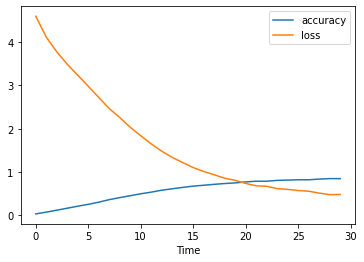

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [84]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

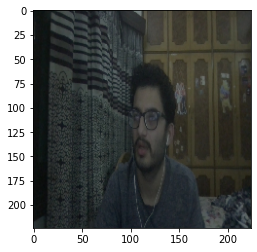

Actual: image.jpg
Predicted: Vicky_Kaushal


In [86]:
predict_image("/Users/aishaandatt/Downloads/IBM/image.jpg")